In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('house.csv')

In [5]:
#we would check for null values first
housing.isnull().sum()
#as here there are no null values in the dataset we don't need to drop any columns

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
#let us see the overall datatypes of the dataset
housing.info()
#we could see from the dataset that there is numerical data present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6830 non-null   int64  
 1   Type           6830 non-null   int64  
 2   Price          6830 non-null   int64  
 3   Method         6830 non-null   int64  
 4   SellerG        6830 non-null   int64  
 5   Distance       6830 non-null   float64
 6   Postcode       6830 non-null   int64  
 7   Bathroom       6830 non-null   int64  
 8   Car            6830 non-null   int64  
 9   Landsize       6830 non-null   int64  
 10  BuildingArea   6830 non-null   float64
 11  YearBuilt      6830 non-null   int64  
 12  CouncilArea    6830 non-null   int64  
 13  Longtitude     6830 non-null   float64
 14  Regionname     6830 non-null   int64  
 15  Propertycount  6830 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


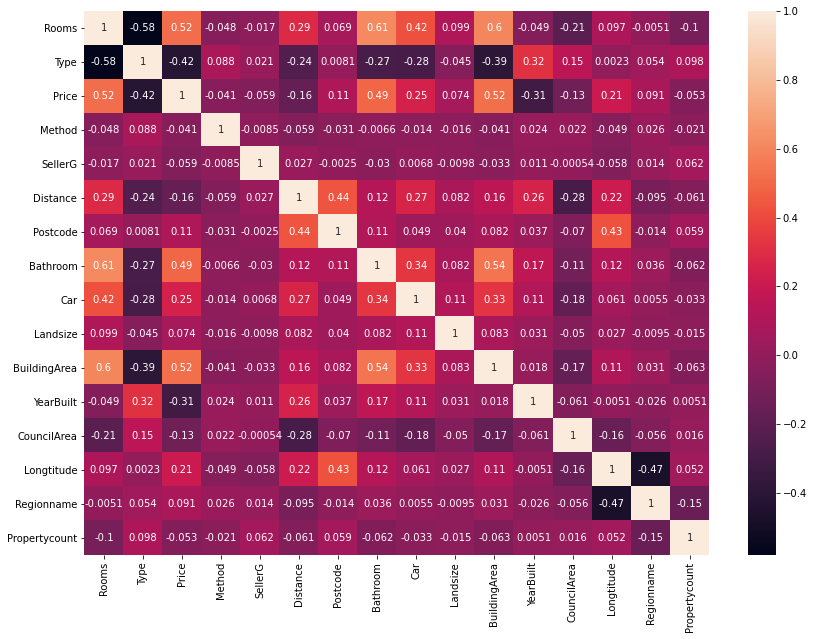

In [12]:
# Let use heatmap to see the coefficient correlation between the columns
plt.figure(figsize=(14,10))
sns.heatmap(housing.corr(),annot=True)
plt.show()
#from the below figure we could see that the Rooms and BulidingArea column have a good correlation with Price 

In [20]:
#Let us first see model the data with BulidingArea
X=housing[["BuildingArea"]]
y=housing["Price"]


In [21]:
#split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)
#training the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
#let us check the intercept value
lr.intercept_

549923.302703086

In [23]:
#let us the check the coefficient value
lr.coef_

array([3677.7692131])

In [24]:
#Testing the data
y_pred = lr.predict(X_test)

In [25]:
#let us check the mean squared error
mean_squared_error(y_test,y_pred)

384703735615.0355

In [27]:
#as the mean squared error (mse) is not efficient we would import r2 score to check how good the model is
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2605839516202948

In [29]:
#from the r2 score of BuildingArea we could see that it is 0.2 which is a little far from the value 1 
#we would now model it with Rooms
X = housing[["Rooms"]]
y = housing["Price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [31]:
mean_squared_error(y_test,y_pred)

387981804218.9228

In [32]:
r2_score(y_test,y_pred)

0.25428337195597517

In [68]:
#as we could see now the r2 score with Rooms is close to that of BuildingArea r2 score
#we would now try  multiple linear regression for a good r2 score 
X = housing[["BuildingArea","Rooms","Type","YearBuilt","CouncilArea","Landsize","Postcode","Regionname"]]
y = housing["Price"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [70]:
mean_squared_error(y_test,y_pred)

300073598124.42645

In [71]:
r2_score(y_test,y_pred)

0.42324647876496646

In [73]:
#from above we could see that with multiple linear regression the r2 score has been increased which states that the above model can be considered
#now let's try with polynomial regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
X = housing[["BuildingArea","Rooms","Type","YearBuilt","CouncilArea","Landsize","Postcode","Regionname"]]
y = housing["Price"]

In [96]:
pf = PolynomialFeatures(2)

In [97]:
X_poly = pf.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred = lr.predict(X_test)

In [100]:
mean_squared_error(y_test,y_pred)

235592739029.43716

In [101]:
r2_score(y_test,y_pred)

0.547181282652226

In [102]:
# r2 score from polynomial regression is much better than linear regression


In [160]:
#let us try some regularization techniques i.e Ridge and Lasso to select the best features 
X = housing.drop("Price",axis=1)
y = housing["Price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [161]:
#Train score
lin.score(X_train,y_train)

0.6376650445007473

In [162]:
#Test score
lin.score(X_test,y_test)

0.5775984742888285

In [163]:
lin.coef_

array([ 1.18003726e+05, -1.68990114e+05, -7.26096664e+02, -1.24949413e+01,
       -4.63229765e+04,  1.06835688e+03,  2.02809523e+05,  5.19366172e+04,
        1.84105442e+01,  1.47156228e+03, -2.83199382e+03, -3.71622245e+03,
        1.47397536e+06,  4.83943558e+04, -1.28615933e+00])

In [164]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [171]:
# Ridge
l2 = Ridge(100)
l2.fit(X_train,y_train)
l2.coef_

array([ 1.25392920e+05, -1.43109773e+05, -3.59335970e+03, -7.60081109e+01,
       -4.68978514e+04,  1.61580876e+03,  2.00281893e+05,  5.30359332e+04,
        1.96080863e+01,  1.60988991e+03, -3.09209168e+03, -5.55640097e+03,
        3.30246244e+05,  1.93288104e+04, -2.41558553e+00])

In [193]:
# Lasso
l1 = Lasso(400)
l1.fit(X_train,y_train)
l1.coef_

array([ 1.18287238e+05, -1.67115148e+05, -5.97462458e+02, -1.61024561e+01,
       -4.63081288e+04,  1.09959669e+03,  2.02505587e+05,  5.16393850e+04,
        1.85253762e+01,  1.48344977e+03, -2.85052997e+03, -3.82578425e+03,
        1.40631664e+06,  4.65751627e+04, -1.36259083e+00])

In [174]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.5775984742888287
1 : 0.5776561628774057
2 : 0.577658747876574
3 : 0.5776160959979202
4 : 0.5775363218739447
5 : 0.5774261255535588
6 : 0.5772910587714115
7 : 0.5771357363817231
8 : 0.5769640052660592
9 : 0.5767790800343537
10 : 0.5765836526282333
11 : 0.576379981288975
12 : 0.5761699631152608
13 : 0.5759551934998945
14 : 0.5757370150217844
15 : 0.5755165578221322
16 : 0.5752947730720959
17 : 0.5750724608111131
18 : 0.5748502931793997
19 : 0.5746288338670038
20 : 0.5744085544436419
21 : 0.5741898481074637
22 : 0.5739730412910719
23 : 0.573758403482755
24 : 0.5735461555567314
25 : 0.5733364768539679
26 : 0.5731295112133328
27 : 0.5729253721183256
28 : 0.572724147096941
29 : 0.572525901489117
30 : 0.5723306816776568
31 : 0.5721385178627432
32 : 0.5719494264476364
33 : 0.5717634120922979
34 : 0.571580469482958
35 : 0.5714005848582654
36 : 0.5712237373264415
37 : 0.5710499000027845
38 : 0.5708790409924558
39 : 0.5707111242398353
40 : 0.5705461102627122
41 : 0.5703839567868503
42 : 0.5

In [183]:
for i in range(200,5000,250):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

200 : 0.577638468615087
450 : 0.5776492367888626
700 : 0.5776164202484835
950 : 0.5775400165706455
1200 : 0.5774200427124107
1450 : 0.5772564673644229
1700 : 0.5770493311183229
1950 : 0.5767986128095376
2200 : 0.5765042817311729
2450 : 0.5761730003807413
2700 : 0.575800166382018
2950 : 0.5753837948193097
3200 : 0.5749238857635275
3450 : 0.5744204391769652
3700 : 0.5738734175040239
3950 : 0.5732828992473293
4200 : 0.572648843211965
4450 : 0.5719712493979283
4700 : 0.5712501178130713
4950 : 0.5704854484826825


In [178]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.577658747876574


In [179]:
l2.coef_

array([ 1.18526765e+05, -1.67167646e+05, -9.63749353e+02, -1.77060659e+01,
       -4.63803932e+04,  1.11403116e+03,  2.03345316e+05,  5.20054515e+04,
        1.84956900e+01,  1.47970106e+03, -2.85325346e+03, -3.86777231e+03,
        1.37855705e+06,  4.59750469e+04, -1.37387648e+00])

In [184]:
l1 = Lasso(alpha=450)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.5776492367888626


In [185]:
l1.coef_

array([ 1.18322697e+05, -1.66880775e+05, -5.81383239e+02, -1.65534031e+01,
       -4.63062733e+04,  1.10350171e+03,  2.02467593e+05,  5.16022300e+04,
        1.85397301e+01,  1.48493562e+03, -2.85284696e+03, -3.83947942e+03,
        1.39785927e+06,  4.63477629e+04, -1.37214458e+00])

In [ ]:
# from Ridge and Lasso we could see that the model score is quite good
#let's try with cross validation

In [186]:
from sklearn.model_selection import cross_val_score

In [206]:
l1_cross = cross_val_score(l1,X,y,cv=7)

In [207]:
l1_cross

array([0.59491777, 0.70468328, 0.65399676, 0.61325422, 0.61272989,
       0.53533608, 0.4515051 ])

In [212]:
l2_cross = cross_val_score(l2,X,y,cv=8)

In [213]:
l2_cross

array([0.6400609 , 0.60316114, 0.68696772, 0.5944676 , 0.5932329 ,
       0.56036081, 0.54781225, 0.45128887])

In [216]:
#accuracy of l1_cross
np.mean(l1_cross)

0.5952032988491333

In [217]:
#accuracy of l2_cross
np.mean(l2_cross)

0.5846690233305378

In [ ]:
#we could see from above that the accuracy of l1_cross is better than l2_cross accuracy